In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from util.pca import perform_pca
from util.k_folds_cross_val import k_folds_x_val, get_cmat, get_metrics
from util.hpo import gridSearchHPO
from util.forward_select import forward_select, forward_select_and_fit

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import sklearn as skl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [6]:
NUM_CLASSES = 6
CLASSES = ["sadnesss", "joy", "love", "anger", "fear"]

# Load all data
train_data = pd.read_csv("../data/training_bert_reduced.csv")
test_data = pd.read_csv("../data/validation_bert_reduced.csv")
validation_data = pd.read_csv("../data/test_bert_reduced.csv")

# Separate X's and y's from each other
FEATURE_COLUMNS = [x for x in train_data if x.startswith("e_")]
LABEL_COLUMN = "label"

In [7]:
X_train = train_data[FEATURE_COLUMNS]
Y_train = train_data[LABEL_COLUMN]

X_test = test_data[FEATURE_COLUMNS]
Y_test = test_data[LABEL_COLUMN]

X_val = validation_data[FEATURE_COLUMNS]
Y_val = validation_data[LABEL_COLUMN]

# These are used to run cross validation
X_train_val = pd.concat([X_train, X_val]) 
Y_train_val = pd.concat([Y_train, Y_test])

# These are used to run val and test for Neural Nets
X_val_test = pd.concat([X_val, X_test])
Y_val_test = pd.concat([Y_val, Y_test])

In [8]:
X_train_unreduced = X_train.to_numpy()
X_val_unreduced = X_val.to_numpy()
X_test_unreduced = X_test.to_numpy()
X_train_val_unreduced = X_train_val.to_numpy()
X_val_test_unreduced = X_val_test.to_numpy()

In [9]:
X_train_used = X_train_unreduced
X_val_used = X_val_unreduced
X_test_used = X_test_unreduced
X_train_val_used = X_train_val_unreduced 
X_val_test_used = X_val_test_unreduced

# Multi-Layer Perceptron

In [10]:
BATCH_SIZE = 16
LEARNING_RATE = 1e-3

mlp = MLPClassifier([100, 100], 'relu', solver="adam")
mlp.fit(X_train_used, Y_train)

MLPClassifier(hidden_layer_sizes=[100, 100])

In [11]:
k_folds_x_val(mlp, X_train_val_used, Y_train_val)

Mean Accuracy: 0.4365


(0.4365,)

(0.348, 0.3405010226407321)


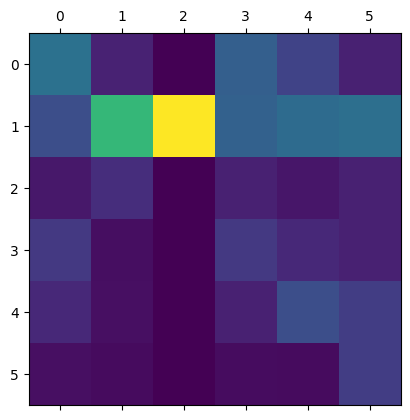

In [12]:
cmat = get_cmat(mlp, X_val_test_used, Y_val_test)
print(get_metrics(mlp, X_val_test_used, Y_val_test))
plt.matshow(cmat)
plt.show()